In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from operator import itemgetter
from matplotlib import gridspec
from pathlib import Path

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

# Multivariate processes

Many processes generate multiple random variables. For example, the weather "creates" sets of variables such as temperature, pressure, wind speed, wind direction, humidity, ozone levels, particulate levels, and so on. In such a case, we talk of joint probability density (or mass) functions.

## Joint distributions

Let's focus on the case of continuous variables, as the situation is similar for discrete or mixed cases.  The **joint probability density function** satisfies the following properties:

1. $f_{XY}(x, y) \ge 0$ for all $x, y$


2. $\int_{S_X} ~ \int_{S_Y} ~ f_{XY}(x, y) ~ dx~dy = 1$


3. For any region $S$ contained in $S_X \times S_Y$, 

$~~~~~~~~~~~~~~~~~~~~~~ P((X, Y) \in S) = \int \int_S ~ f_{XY}(x, y) ~ dx~dy$




### Examples

Consider an instrument with two identical independent parts set in parallel so as to provide redundancy.  The failure of each part is described by a exponential process with average time to failure of $\lambda = 1$ year.  

1. What is the joint probability density function?

2. What is the probability that the instrument will fail before 1 year?

3. What if the parts where placed in serie?




Consider two dice, $X$ and $Y$.  

1. What is the joint mass probability function?

2. What is the probability that both dice return 2 or less?

3. What is the probability that one of the die returns 2 or less?

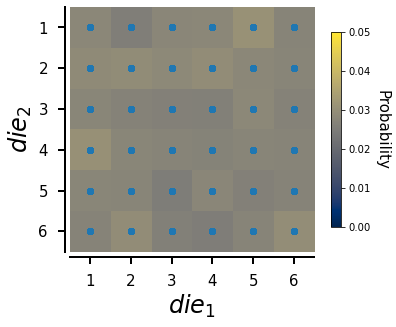

In [4]:
n = 6
L = 15000
x = np.arange(1, n+1)

die_1 = stats.randint.rvs(0, n, size = L)
die_2 = stats.randint.rvs(0, n, size = L)

# Calculate histogram
#
h = [0]*n
hist = np.array([h]*n)
# print(hist)

for i, j in zip(die_1, die_2):
    hist[i, j] += 1   
# print(hist)
hist = hist / L

# Plot data
#
fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, '$die_1$', '$die_2$', font_size = my_font_size)

temp = ax.imshow(hist, cmap = plt.cm.cividis, vmin = 0, vmax = 0.05)

ax.plot(die_1, die_2, 'o', 'r', alpha = 0.5)

cbar = ax.figure.colorbar( temp, ax = ax, fraction = .08, shrink = 0.8,
                           ticks = [0, 0.01, 0.02, 0.030, 0.04, 0.05], )
cbar.ax.set_ylabel( 'Probability', rotation = -90, va = "bottom", 
                    fontsize = my_font_size )

ax.set_xticks(x - 1)
ax.set_xticklabels(x)

ax.set_yticks(x - 1)
ax.set_yticklabels(x)

plt.show()

In [3]:
a = [2, 3, 4, 5]
b = [ 5, 2, 4, 1]

for i, j, l  in zip(a, b, a ):
    print(i, j, l)

2 5 2
3 2 3
4 4 4
5 1 5


## Marginal distributions

Especially when considering probability density functions of many random variables, one may want to visualize what is going on with the probability for **each** of those variables. In that case, one wants to compute the marginal probability density function.  

Taking the formulation above, the marginal probability density for $X$ is

> $~~~~~~~~~~f_X (x) = \int_{S_Y} ~ f_{XY}(x, y) ~ dy$ 



[1 2 3 4 5 6]
[0.1654     0.16273333 0.16613333 0.1706     0.16773333 0.1674    ]


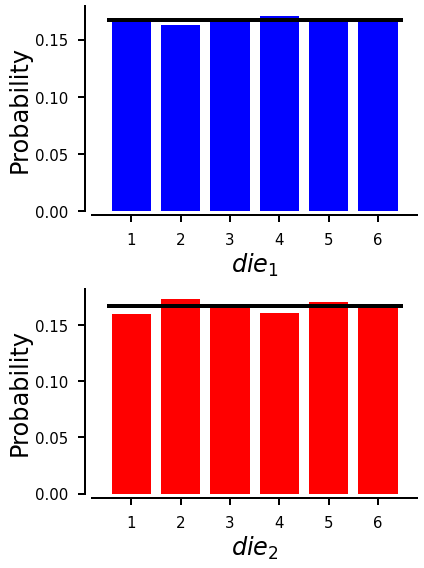

In [4]:
# Calculate marginal histograms
#
hist_1 = np.array([0]*n)
hist_2 = np.array([0]*n)
for i, j in zip(die_1, die_2):
    hist_1[i] += 1
    hist_2[j] += 1
    
hist_1 = hist_1 / L
hist_2 = hist_2 / L

print(x)
print(hist_1)
# Plot data
#
ax = []
my_font_size = 15
fig = plt.figure( figsize = (6, 8) )

ax.append( fig.add_subplot(2,1,1) )
half_frame(ax[0], '$die_1$', 'Probability', font_size = my_font_size)
ax[0].bar(x, hist_1, color = 'b')
ax[0].hlines(1/n, 0.5, n+0.5, color = 'k', linewidth = 4)
ax[0].set_xticks(x)
ax[0].set_xticklabels(x)

ax.append( fig.add_subplot(2,1,2) )
half_frame(ax[1], '$die_2$', 'Probability', font_size = my_font_size)
ax[1].bar(x, hist_2, color = 'r')
ax[1].hlines(1/n, 0.5, n+0.5, color = 'k', linewidth = 4)
ax[1].set_xticks(x)
ax[1].set_xticklabels(x)

plt.tight_layout()
plt.show()

## Conditional distributions

In the example of the instrument failure, the failure of each of the parts is independent of what is happening with the other part.  This means that the joint probability distribution is simply the product of the individual probability distributions. 

However, in many cases of interest, the two outcomes are **not** independent.  In that case, it becomes important to know the conditional probability distribution.  Using Bayes theorem, we can write that

> $~~~~~~~~~~ f_{Y|x}(y) = f_{XY} (Y = y ~ | ~ X = x) = \frac{ f_{XY}(x, y)}{f_X(x)}~~~~~~$ for $~~~~~~~f_X(x) > 0$


Understanding the correlation between random variables is extremely important, as is its quantification.


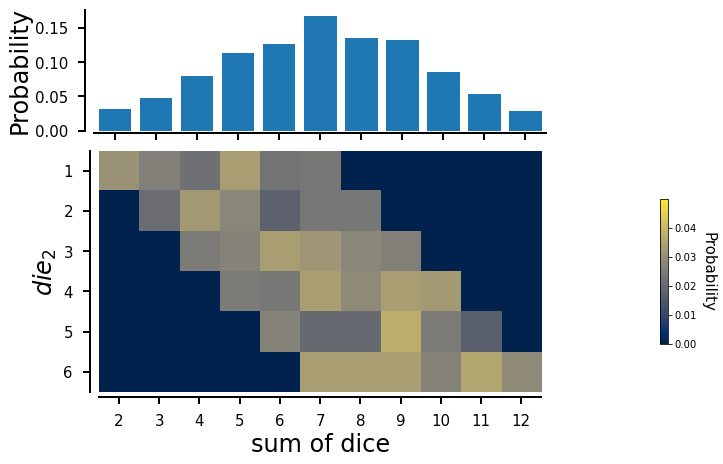

In [5]:
n = 6
L = 1000
x = np.arange(1, n+1)

die_1 = stats.randint.rvs(0, n, size = L)
die_2 = stats.randint.rvs(0, n, size = L)

sum_dice = die_1 + die_2
y = np.arange(2, 2*n+1)

# Calculate histogram
#
h = [0]*(2*n-1)
hist_sum = np.array(h)
hist = np.array([h]*n)
# print(hist)

for i, j in zip(die_1, sum_dice):
    hist_sum[j] += 1
    hist[i, j] += 1

hist_sum = hist_sum / L
hist = hist / L
# print(hist)

# Plot data
#
ax = []
my_font_size = 15
fig = plt.figure( figsize = (10, 6.5) )
gs = gridspec.GridSpec(2, 2, height_ratios = [1, 2], width_ratios = [4, 1])

ax.append( fig.add_subplot(gs[0]) )
half_frame(ax[0], '', 'Probability', font_size = my_font_size)
ax[0].bar(y, hist_sum, )
ax[0].set_xlim(1.5, 12.5)
ax[0].set_xticks(y)
ax[0].set_xticklabels([])          
          
ax.append( fig.add_subplot(gs[2]) )
half_frame(ax[1], 'sum of dice', '$die_2$', font_size = my_font_size)
temp = ax[1].imshow(hist, cmap = plt.cm.cividis, vmin = 0, vmax = 0.05)


ax.append( fig.add_subplot(gs[3]) )
ax[2].set_axis_off()
cbar = ax[2].figure.colorbar( temp, ax = ax[2], fraction = .08, shrink = 0.6,
                              ticks = [0, 0.01, 0.02, 0.030, 0.04], )
cbar.ax.set_ylabel( 'Probability', rotation = -90, va = "bottom", 
                    fontsize = my_font_size )

ax[1].set_xticks(y - 2)
ax[1].set_xticklabels(y)

ax[1].set_yticks(x - 1)
ax[1].set_yticklabels(x)

plt.tight_layout()
plt.show()

### Covariance and correlation

The covariance between two random variables is defined as

> $~~~~~~~~~~cov(X, Y) = \sigma_{XY} = E[(X-\mu_x)(Y-\mu_Y)] = E[XY] - \mu_X \mu_Y$

where

> $~~~~~~~~~~E[g(X, Y)] = \int_{S_X} \int_{S_Y} ~ g(x, y) ~ f_{XY}(x, y) ~ dx ~ dy$ 


**Note that covariance is a measure of linear association**.  Non-linear monotonic associations will result in non-zero covariances, but do not measure correctly the degree of association between the two variables. Sometimes this can be handled approximately by considering the covariance of the rank of the random variables.

Non-linear, or even linear,  non-monotonic associations can frequently yield no covariance between variables. In this case, considering the covariance of the rank of the random variables is not going to solve the problem at all. 

In [ ]:
help(stats.pearsonr)
# help(stats.spearmanr)
# help(stats.kendalltau)

In [ ]:
result = np.cov(sum_dice, die_1)
print(result)
print(f"The covariance between the two random variables is {result[0,1]:.3f}\n")

result = stats.pearsonr(die_2[10:20], die_1[10:20])
print(result)
print(f"Pearson's R is {result[0]:.3f} with an estimated significance level of {result[1]:}\n")

result = stats.spearmanr(sum_dice, die_1)
print(result)
print(f"Spearman's rho is {result.correlation:.3f} with an estimated "
      f"significance level of {result.pvalue:}\n")

result = stats.kendalltau(sum_dice, die_1)
print(result)
print(f"Kendall's tau is {result.correlation:.3f} with an estimated "
      f"significance level of {result.pvalue:}\n")


# Correlation is not causation and other cudgels

Since at least the time of the Kabbalah, there has been a tradition of finding meaning and associations between unrelated things. From those that ["demonstrated" that the dimensions of the three Giza pyramids are in perfect scale to some planetary distances in the solar system](https://www.ancient-origins.net/forum/great-pyramid-decoded-solar-system-changes-history-002631), to astrology and so on.

There is even a [site](https://www.tylervigen.com/spurious-correlations) dedicated to it.

**The pithy statement -- many times used as a cudgel -- is that correlation is not the same as causation.**  

However, this mantra has resulted in the lazy dismissal of potentially true associations because said association was not detected through an experiment or randomized clinical trial or something of the sort.


In [ ]:
# Generate N random data sets of size L drawn from whatever distribution you like
#
n = 6
L = 20
N = 200
die_total_sets = []

for i in range(N):
    die = stats.randint.rvs(0, n, size = L)
    die_total_sets.append(die)

# print(len(die_total_sets))
# Calculate the correlation between every pair of datasets
correlation_data = []
for i in range(N-1):
    data_1 = die_total_sets[i]
    for j in range(i+1,N):
        data_2 = die_total_sets[j]
#         print(i, j)
        correlation = stats.pearsonr(data_1, data_2)
#         print(correlation)
        correlation_data.append( (correlation[0], i, j) )
        
# What is the maximum and minimum correlation coefficient your observe

my_max = max(correlation_data, key = itemgetter(0))
print(my_max)

my_min = min(correlation_data, key = itemgetter(0))
print(my_min)

ax = []
my_font_size = 15
fig = plt.figure( figsize = (14, 6.5) )
gs = gridspec.GridSpec(2, 1)

ax.append( fig.add_subplot(gs[0]) )
half_frame(ax[0], 'Event', 'Die', font_size = my_font_size)
ax[0].bar( np.arange(0,L), die_total_sets[my_max[1]]-die_total_sets[my_max[2]], 
           color = 'r', alpha = 0.8, width = 0.8 )
ax[0].set_ylim(-5,5)
ax[0].set_xlim(-0.5,L)
ax[0].hlines([-4, -2, 0, 2, 4], -0.5, L-0.5, color = '0.4', lw = 2)

ax.append( fig.add_subplot(gs[1]) )
half_frame(ax[1], 'Event', 'Die', font_size = my_font_size)
ax[1].bar( np.arange(0,L), die_total_sets[my_min[1]]-die_total_sets[my_min[2]],
           color = 'b', alpha = 0.8, width = 0.8 )
ax[1].set_ylim(-5,5)
ax[1].set_xlim(-0.5,L)
ax[1].hlines([-4, -2, 0, 2, 4], -0.5, L-0.5, color = '0.4', lw = 2)

plt.tight_layout()
plt.show()

# Identify the fraction of pairs that have "large" correlations